<a href="https://colab.research.google.com/github/kinanajoudeh/Cirrhosis-Status-Classification/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Kinana Jouda


# Contents

This notebook aims to predict product sales using a dataset containing information about products, outlets, and sales.
Our target feature is Item Outlet Sales.

We will go through the following steps:
1. Data Cleaning
2. Exploratory Data Analysis (EDA)
3. Feature Inspection
4. Preprocessing
5. Modeling
6. Evaluation

# Data Dictionary
  

  1. **Item_Identifier**:	Product ID
  2. **Item_Weight**:	Weight of product
  3. **Item_Fat_Content**:	Whether the product is low-fat or regular
  4. **Item_Visibility**:	The percentage of total display area of all products in a store allocated to the particular product
  5. **Item_Type**:	The category to which the product belongs
  6. **Item_MRP**:	Maximum Retail Price (list price) of the product
  7. **Outlet_Identifier**:	Store ID
  8. **Outlet_Establishment_Year**:	The year in which store was established
  9. **Outlet_Size**:	The size of the store in terms of ground area covered
  10. **Outlet_Location_Type**:	The type of area in which the store is located
  11. **Outlet_Type**:	Whether the outlet is a grocery store or some sort of supermarket
  12. **Item_Outlet_Sales**:	Sales of the product in the particular store. This is the target variable to be predicted.


# Predefined functions and configurations

### Suppress Warnings

In [213]:
import warnings
warnings.filterwarnings('ignore')

### Univariate EDA Functions

In [214]:
target='Item_Outlet_Sales'
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None, ftype='Categorical'):
  temp_df = df.copy()
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  fig, ax = plt.subplots(figsize=figsize)
  sns.countplot(data=temp_df, x=x, ax=ax, hue=x, order=order)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f"Column: {x}", fontweight='bold')
  fig.tight_layout()
  plt.show()

  # Feature type
  print(f"- Feature Type: {ftype}")
  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  car = "Low"
  if nunique >= 10:
    car = "High"
  print(f"- Cardinality: {car}")

  val_counts = temp_df[x].value_counts(dropna=False)
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]
  perc_most_common = freq / len(temp_df) * 100

  # Print the common value
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5), **kwargs):
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  binwidth = kwargs.get('binwidth', None)
  # Histogram on Top
  if binwidth:
    sns.histplot(data=df, x=x, binwidth=binwidth, ax=axes[0])
  else:
    sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


###Multivariate EDA Functions

In [215]:
def plot_categorical_vs_target(df, x, y=target,figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None, estimator="mean"):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, hue=x, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None, estimator=estimator)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y=target,
                           figsize=(6,4)):
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','linewidths':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

##Metrics Evaulation Function

In [216]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = root_mean_squared_error(y_true, y_pred)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

# Load and Inspect Data

In [217]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
fpath = "/content/drive/MyDrive/Axos DA/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lkws = dict(color='k')
rkws = dict(edgecolor='w')

In [220]:
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

  - There are 8523 rows and 12 columns.
  - Each row represents the data of a specific item in a specific outlet.
  



In [221]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [222]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols].describe()

Item_Identifier Item_Fat_Content              Item_Type  \
count             8523             8523                   8523   
unique            1559                5                     16   
top              FDW13          Low Fat  Fruits and Vegetables   
freq                10             5089                   1232   

       Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
count               8523        6113                 8523               8523  
unique                10           3                    3                  4  
top               OUT027      Medium               Tier 3  Supermarket Type1  
freq                 935        2793                 3350               5577

- This data is for sale prices of 1559 items across  around 10 outlets
- For modeling, Item Identifier, Item Type are to be dropped due to their high cardinality.

### Missing values

For modeling we are splitting the data into train and test sets. Missing values will be handled after that, in the preprocessing step but let us just take a look at them right now.

In [223]:
print("The number of total missing values = ", df.isna().sum().sum())

The number of total missing values =  3873


# Clean Data

### Duplicates:

In [224]:
duplicated_filter = df.duplicated()
print("The number of duplicated rows in the data is: ", duplicated_filter.sum())

The number of duplicated rows in the data is:  0


### Data Inconsistancies:

In [225]:
low_cardinality_cols = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in low_cardinality_cols:
  print("Value counts for column: ", df[col].value_counts())
  print("\n")

Value counts for column:  Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Value counts for column:  Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64


Value counts for column:  Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64


Value counts for column:  Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64




Item_Fat_Content column has inconsistencies, we replace them as follows:

In [226]:
replcaments = {
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(replcaments)
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

# Exploratory Data Analysis

In [227]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

## Univariate Visualization

#### How are the Item Outlet Sales distributed? What is the range of values in this dataset?


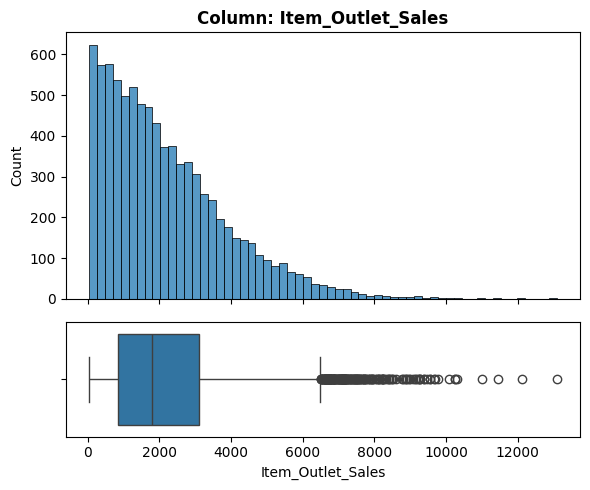

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Outlet_Sales'}, xlabel='Item_Outlet_Sales', ylabel='Count'>,
        <Axes: xlabel='Item_Outlet_Sales'>], dtype=object))

In [228]:
explore_numeric(df, 'Item_Outlet_Sales')

  - Item Outlet Sales values are ranging from 30 to 13,000 .
  - The distribution is right-skewed meaning that a large number of products have low to medium sales, while a small number of items have very high sales. This pattern suggests that high sales are more concentrated among a few products or outlets.
  - The median of Item Sales is less than 2000, meaning half of the items have achieved sales less than 2000.
  - There are some items that have achieved extreme values of sales going up to 13000.
  

####How are the Item Maximum Retail Prices (MRP) distributed? What is the range of values in this dataset?

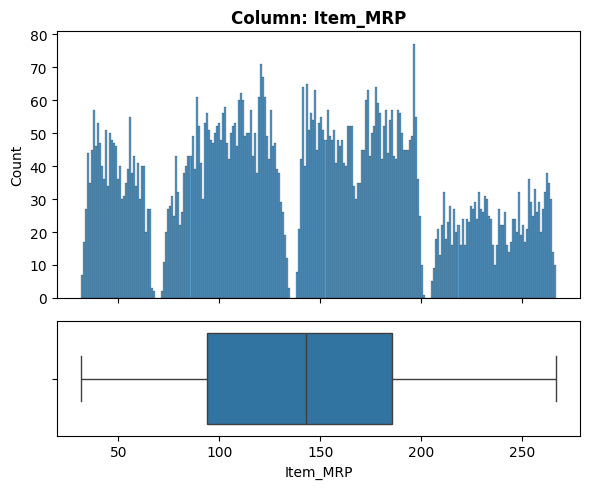

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_MRP'}, xlabel='Item_MRP', ylabel='Count'>,
        <Axes: xlabel='Item_MRP'>], dtype=object))

In [229]:
explore_numeric(df, 'Item_MRP', binwidth=1)

In [230]:
df['MRP_Category'] = pd.cut(df['Item_MRP'], bins=[0, 70, 135, 205, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])
df['MRP_Category'].value_counts()

MRP_Category
High         3003
Medium       2751
Very High    1428
Low          1341
Name: count, dtype: int64

  - The MRP (Maximum Retail Price) shows a somewhat uniform distribution, with prices ranging widely between 30 and 270 units, which indicates that items are spread across the full spectrum of pricing the range.
  - There seem to be an obvious segmentation in the distribution, which can imply that there are 4 price ranges for the selled goods:
    1. ***Low Priced Items:***
      
      With prices less than 70.

    2. ***Medium Priced Items:***

      With prices between 70 and 135.

    3. ***High Priced Items:***

      With prices between 135 and 205.

    4. ***Very High Priced Items:***

      With prices greater than 205.

  - Most of the items have medium or high prices:
    - 2751 medium priced items  
    - 3003 high priced items
  - Less items have low and very high prices:
    - 1341 low priced items
    - 1428 high priced items


#### What items types does this dataset contain sales for?

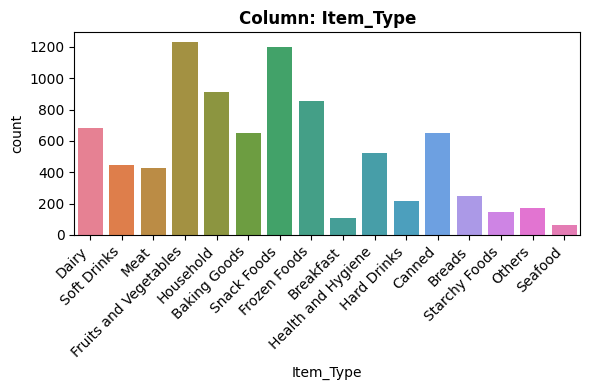

- Feature Type: Categorical
- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Cardinality: High
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Type'}, xlabel='Item_Type', ylabel='count'>)

In [231]:
explore_categorical(df, 'Item_Type')

The dataset provides the largest number of detailed sales information across different outlets on these categories:
  - Fruits and vegetables
  - Snack Foods
  - House Hold
  - Frozen Foods

The dataset provides less number of detailed sales information across different outlets on these categories:
  - Breakfast
  - Seafood
  - Startchy Foods

## Multivariate Visualization


####Is there a clear correlation between the numerical features in the dataset?

<Axes: >

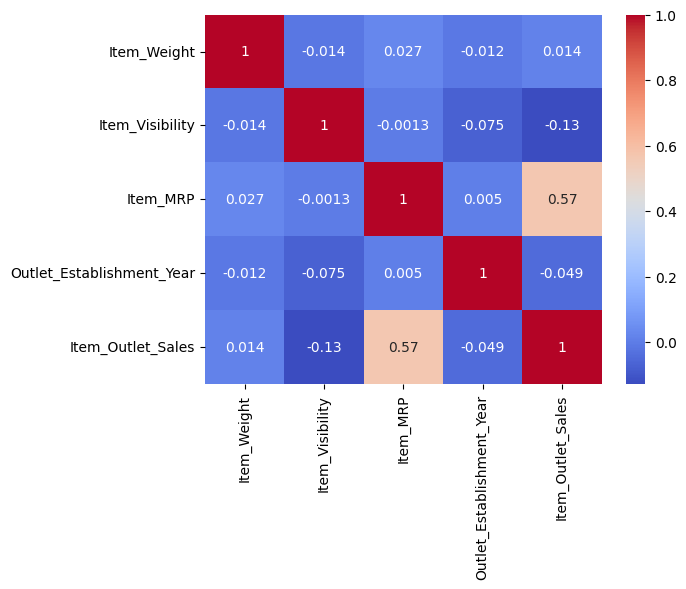

In [232]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

The heat map shows only one positive relatively strong relationship with a 0.57 correlation coeffeicient between the Item MRP and the Item Outlet Sales.
In other words, when the MRP increase, the Item Outlet Sales increases too.

#### How does the Item MRP influence the Item Outlet Sales across the four different price groups identified earlier?

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

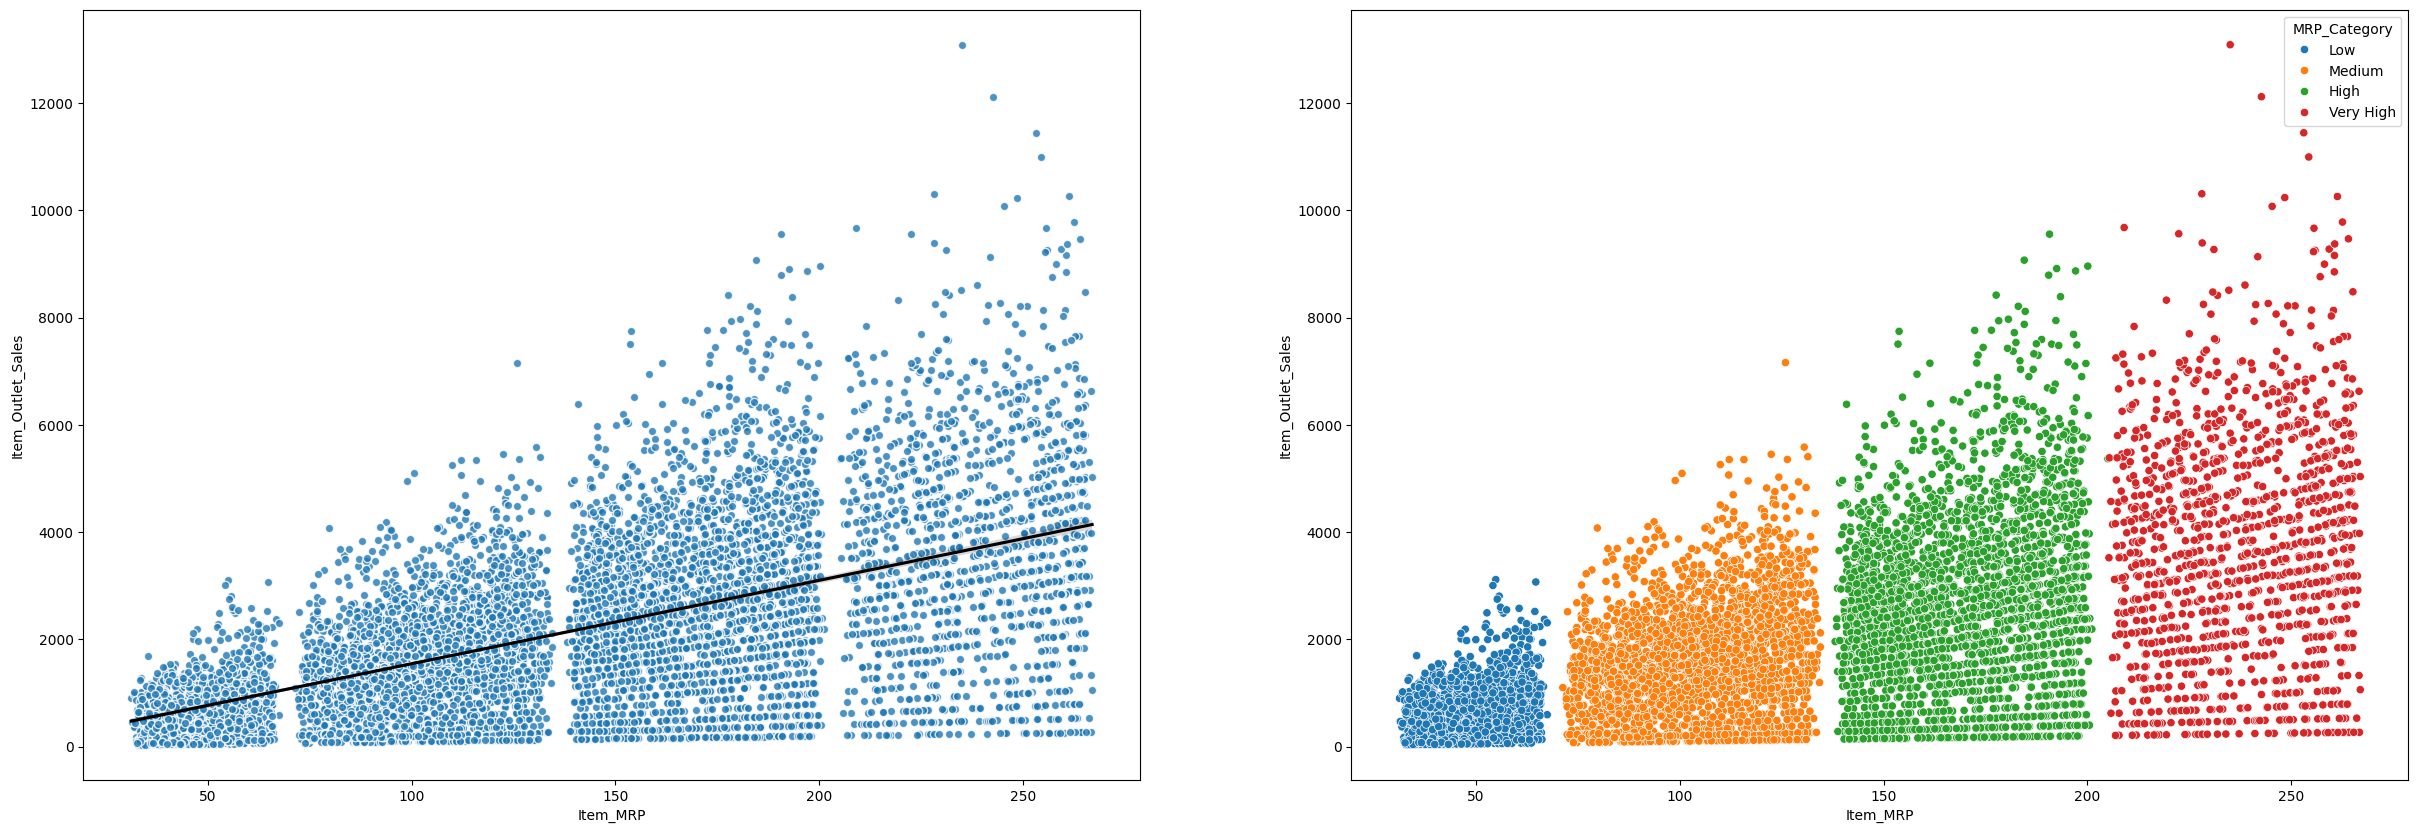

In [233]:
fig, axs = plt.subplots(ncols=2, figsize=(30, 10))
sns.regplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', line_kws=lkws, scatter_kws=rkws, ax=axs[0])
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', edgecolor='w', hue='MRP_Category', ax=axs[1])

In [234]:
df.groupby('MRP_Category')['Item_Outlet_Sales'].agg(['mean', 'sum', 'min', 'max'])

mean           sum       min         max
MRP_Category                                                 
Low            736.474596  9.876124e+05   33.2900   3112.6150
Medium        1615.644414  4.444638e+06   73.2380   7158.6816
High          2632.137093  7.904308e+06  139.8180   9554.2300
Very High     3679.669120  5.254568e+06  207.0638  13086.9648

As said, when Item_MRP increase, the Item_Outlet_Sales increase:
  - As the retail price increases, sales also tend to rise. **Lower-priced** items are generating less total sales as the **higher-priced** ones.
  - The data appears to split into four groups, suggesting that the previousely mentioned pricing intervals are affecting the Item Outlet Sales:
    1. ***Low Price items have:***
      - The lowest average sales (~736)
      - Lowest total sales of 987,612
    2. ***Medium Price items have:***
      - Higher average sales (~1615)
      - Total sales of 4,444,637
    3. ***High Price items show:***
      - More significant sales (~2632)
      - Highest Total sales of 7,904,307
    4. ***Very High Price items have:***
      - The highest average sales (~3679)
      - Total sales of 5,254,567
  - **Very high-priced** items, despite the fact that they are a smaller set than other groups like the medium and high price items, they have achieved the maximum average of sales across all of the groups. That could be due to multiple possible reasons, maybe some expensive items are heavily marketed or backed by strong a brand, making them more desirable. Or maybe the fact that higer prices often imply better quality.

  - **High-priced** items achieved the highest total sales among all groups. However, **very high-priced** items may not have performed as well, possibly due to their extreme prices reaching up to 13,000, which could make them less accessible to a broader customer base.


  To understand exactly why higher-priced items outperform cheaper ones in total sales, it is important to understand the customer demographics, item features and  market positioning.

####Within the pricing groups, what does the distribution look like for each one, and are there any notable patterns or variations?

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

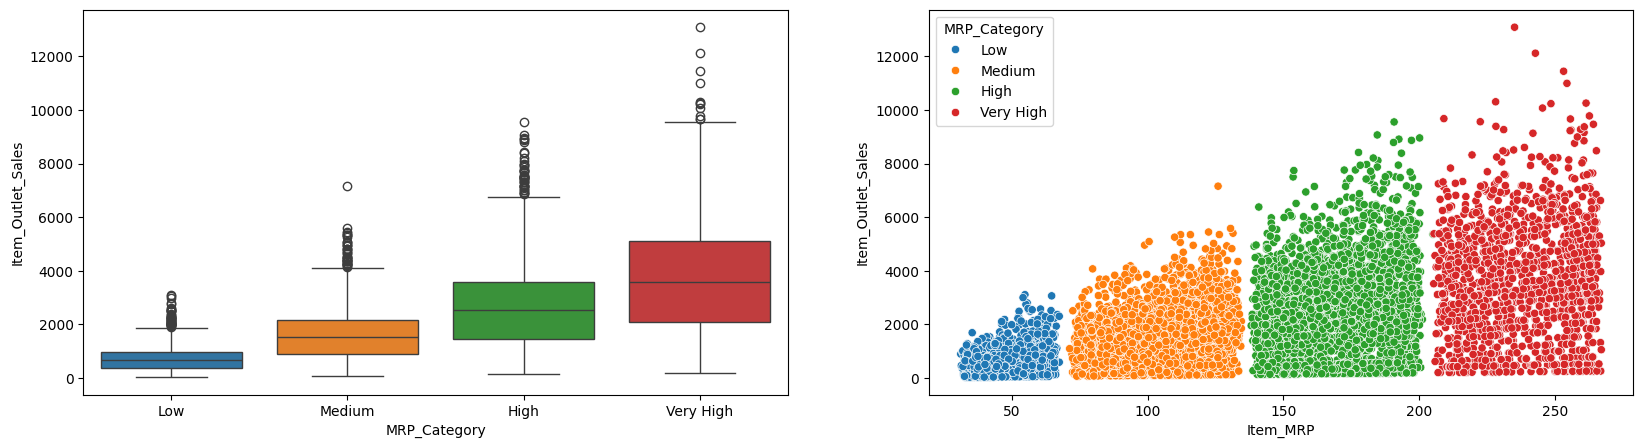

In [235]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 5))

sns.boxplot(data=df, y='Item_Outlet_Sales', x='MRP_Category', hue='MRP_Category', ax=axs[0])
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', edgecolor='w', hue='MRP_Category', ax=axs[1])


The interquartile range (IQR) of sales is largest for the **very high-priced** group, followed by the **high**, **medium**, and **low-priced** groups, respectively. Additionally, the outliers in the **very high-priced** group are spread across a wider range compared to those in the high, medium, and low price groups respectively.

In other words, as we move higher within the groups, the range of the group prices increase.

####How do Outlet Type, Size, and Location Type influence the total Item Outlet Sales?

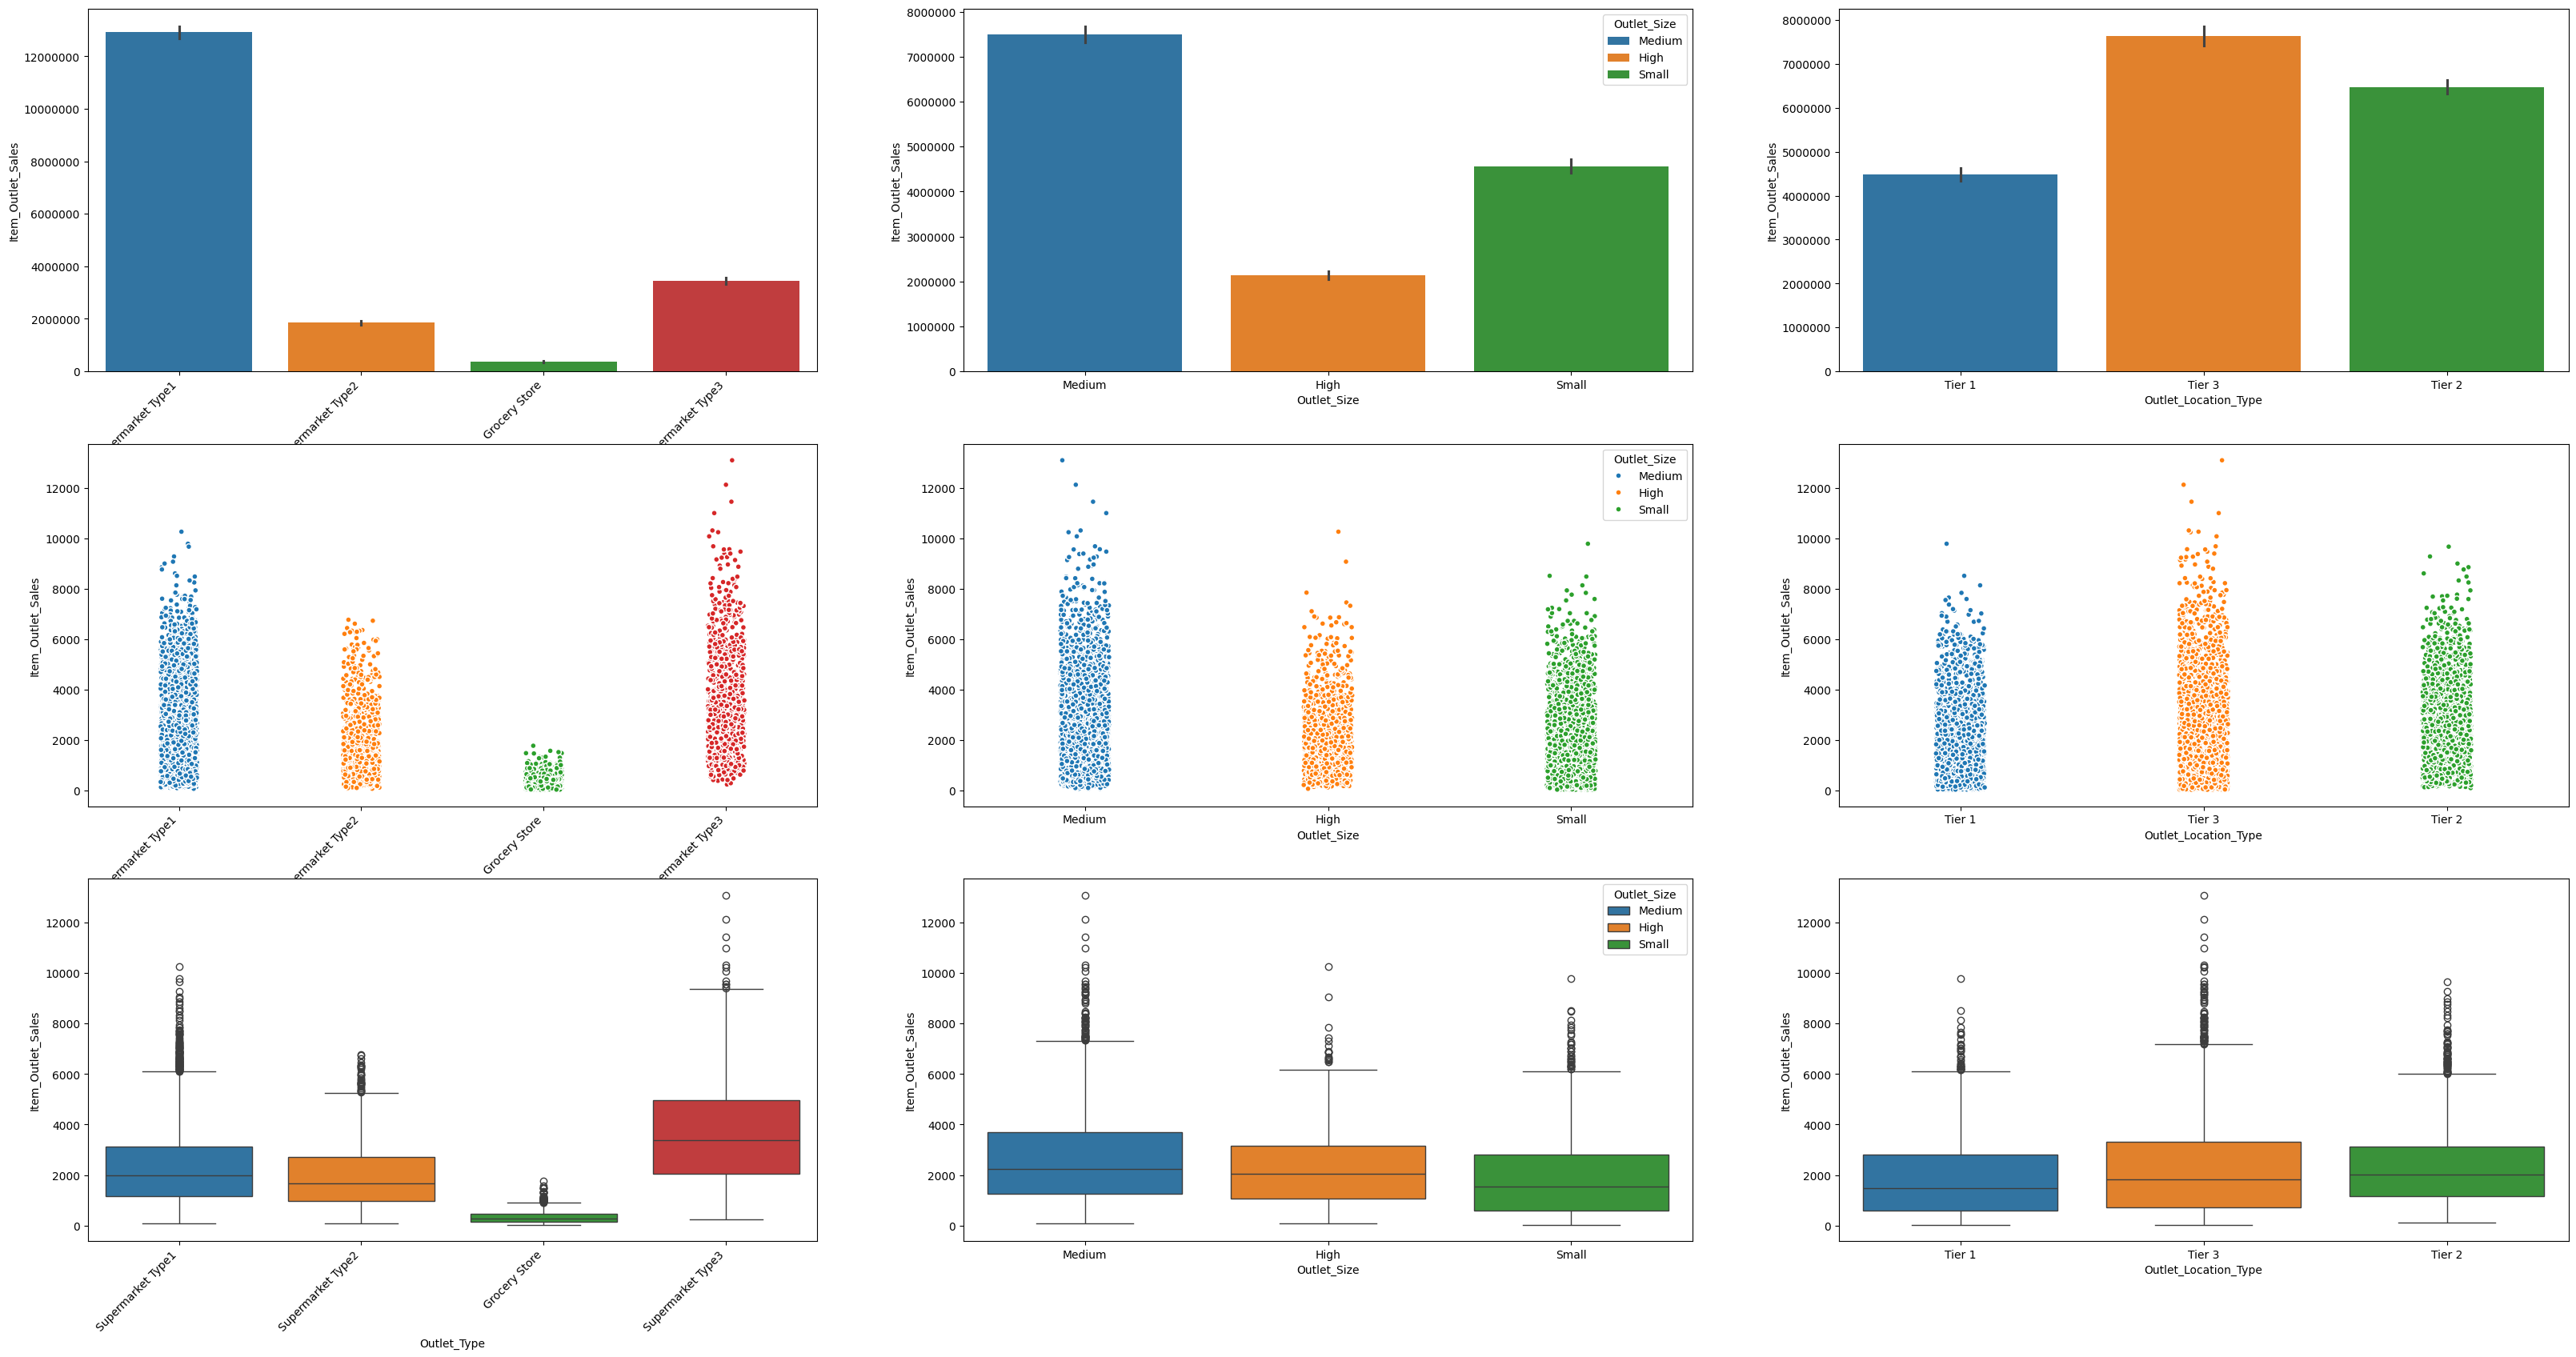

In [236]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(40, 20))

ax = sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Type',  ax=axs[0][0], estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
sns.barplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Size',  ax=axs[0][1], estimator=sum)
sns.barplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type', ax=axs[0][2], estimator=sum)

ax = sns.stripplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales',hue='Outlet_Type', edgecolor='w', linewidth=1, ax=axs[1][0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
sns.stripplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Size', edgecolor='w', linewidth=1, ax=axs[1][1])
sns.stripplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type', edgecolor='w', linewidth=1, ax=axs[1][2])

ax = sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales',hue='Outlet_Type', ax=axs[2][0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
sns.boxplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Size', ax=axs[2][1])
sns.boxplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type', ax=axs[2][2])

axs[0][0].ticklabel_format(style='plain', axis='y')
axs[0][1].ticklabel_format(style='plain', axis='y')
axs[0][2].ticklabel_format(style='plain', axis='y')


  - ***Outlet Type vs Outlet Item Sales:***
      - The bar plot reveals that items sold in **Supermarket Type1** have the highest total Item Outlet Sales, exceding **12 Million**, followed by **Supermarket Type3** at approximately **3M**, and **Supermarket Type2** at **2M**. In contrast, **Grocery Stores** show a significantly lower total sales barely reaching **250 Thousand**.
      - The strip plot illustrates the distribution of actual sales across each outlet type, with **Supermarket Type 3** reaching a maximum value exceeding **13,000**.
  - ***Outlet Size vs Outlet Item Sales:***
      - The bar plot shows that **medium-sized** outlets achieve the highest total Item Outlet Sales, exceeding **7.5M**, followed by **small** outlets at around **4M**, while **large** outlets have total sales around **2M**.
      - The strip plot illustrates the distribution of actual sales across each outlet size, with **medium** outlets reaching a maximum sales value exceeding **12,000**.
  - ***Outlet Location Type vs Outlet Item Sales:***
      - The bar plot indicates that outlet located in **Tier3** have the highest total Item Outlet Sales, around **7.5M**, followed by **Tier2** slightly exceding **6M**. Then **Tier1** outlets, with total sales around **4.5M**.
      - The strip plot shows the distribution of actual sales across each outlet location type, revealing that **Tier3** has the highest actual sales reaching up to more than **12,000**, the opposite of what might be assumed from the bar plot. This is followed by **Tier2** and **Tier1**.


  

Until now it looks like **Supermarket Type 1**, **Medium-Sized** stores, and outlets located in **Tier 3** consistently show the highest total Item Outlet Sales.

####How do outlet size and outlet location type affect total item outlet sales within the same outlet type?

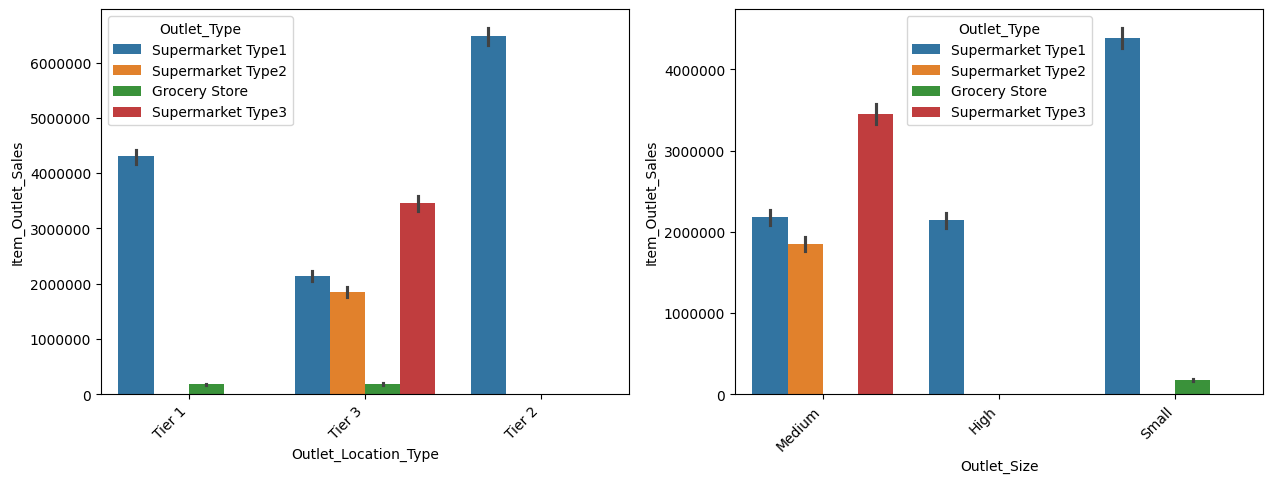

In [237]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

ax = sns.barplot(data=df, hue='Outlet_Type', y='Item_Outlet_Sales', x='Outlet_Location_Type', ax=axs[0], estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax = sns.barplot(data=df, hue='Outlet_Type', y='Item_Outlet_Sales', x='Outlet_Size', ax=axs[1], estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

axs[0].ticklabel_format(style='plain', axis='y')
axs[1].ticklabel_format(style='plain', axis='y')

  - ***Outlet Location Type with Item Outlet Sales( Outlet Type as hue):***
    - The barplot shows that within **Tier3** locations, **Supermarket Type3** have achieved the highest total sales, reaching to more than **3M** out of the **7.5M** total sales of **Tier3**


  - ***Outlet Size with Item Outlet Sales( Outlet Type as hue):***  
    - The barplot shows that within **medium-sized** outlets,**Supermarket Type3** have achieved the highest total sales, raround **3.5M** out of the **7.5M** total sales of **Tier3**

    - In contrast, **high** and **small-sized** outlets primarily have **Supermarket Type1** outlets with similar average sales.
  
  - There seem to be variability in both plots, but there is a shortage of data that is making it harder to see the reasen for variability overhere.



  - Within the same Outlet type, such as Grocery Stores and Supermarket Type 1, the average sales across different **location types** *(Tier 1, Tier 2, Tier 3)* **and** across **outlet sizes** *(small, medium, high)*  are relatively consistent.
  

This suggests that neither **Outlet Location Type** nor **Outlet Size** impact average sales within the same outlet type.

This might also apply accross all the data, but because there is no variety of *outlet location types* or *outlet sizes* in supermarkets of **Type2** and **Type3**.


####Which **item types** that are achieving the highest and lowest total sales?

In [238]:
df_it = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()
df_it = df_it.sort_values(ascending=False)
df_it = df_it.to_frame()
df_it.head()

Item_Outlet_Sales
Item_Type                               
Fruits and Vegetables       2.820060e+06
Snack Foods                 2.732786e+06
Household                   2.055494e+06
Frozen Foods                1.825735e+06
Dairy                       1.522594e+06

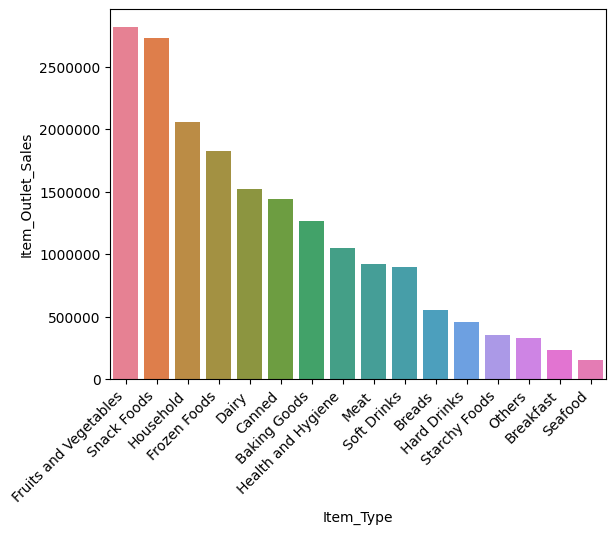

In [239]:
ax = sns.barplot(data= df_it, x=df_it.index, y='Item_Outlet_Sales', hue=df_it.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.ticklabel_format(style='plain', axis='y')

The item types that are achieving the highest total sales are:
  - Fruits and vegetables
  - Snack Foods
  - House Hold
  - Frozen Foods

The item types that are achieving the lowest total sales are:
  - Breakfast
  - Seafood
  - Others

####Which items are achieving the highest and lowest total sales?

In [240]:
df_id = df.groupby('Item_Identifier')['Item_Outlet_Sales'].sum()
df_id = df_id.sort_values(ascending=False)
df_id = df_id.to_frame()
df_id.head()

Item_Outlet_Sales
Item_Identifier                   
FDY55                   42661.8008
FDA15                   41584.5364
FDZ20                   40185.0248
FDF05                   36555.7490
FDA04                   35741.4756

<Axes: xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>

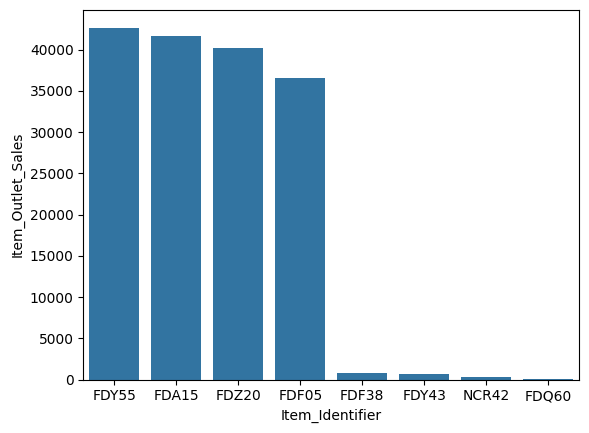

In [241]:
hi_lo = pd.concat([df_id.head(4), df_id.tail(4)])
sns.barplot(data= hi_lo, x=hi_lo.index, y='Item_Outlet_Sales')

In [242]:
print("The items that are achieving the highest total sales are:")
for id in df_id.head(4).index:
  print("Id: ", id, ", Type: ", df[df['Item_Identifier'] == id]['Item_Type'].values[0])

print("\nThe items that are achieving the lowest total sales are:")
for id in df_id.tail(4).index:
  print("Id: ", id, ", Type: ", df[df['Item_Identifier'] == id]['Item_Type'].values[0])

The items that are achieving the highest total sales are:
Id:  FDY55 , Type:  Fruits and Vegetables
Id:  FDA15 , Type:  Dairy
Id:  FDZ20 , Type:  Fruits and Vegetables
Id:  FDF05 , Type:  Frozen Foods

The items that are achieving the lowest total sales are:
Id:  FDF38 , Type:  Canned
Id:  FDY43 , Type:  Fruits and Vegetables
Id:  NCR42 , Type:  Household
Id:  FDQ60 , Type:  Baking Goods


####Does the year an outlet was established have an impact on its total sales?

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

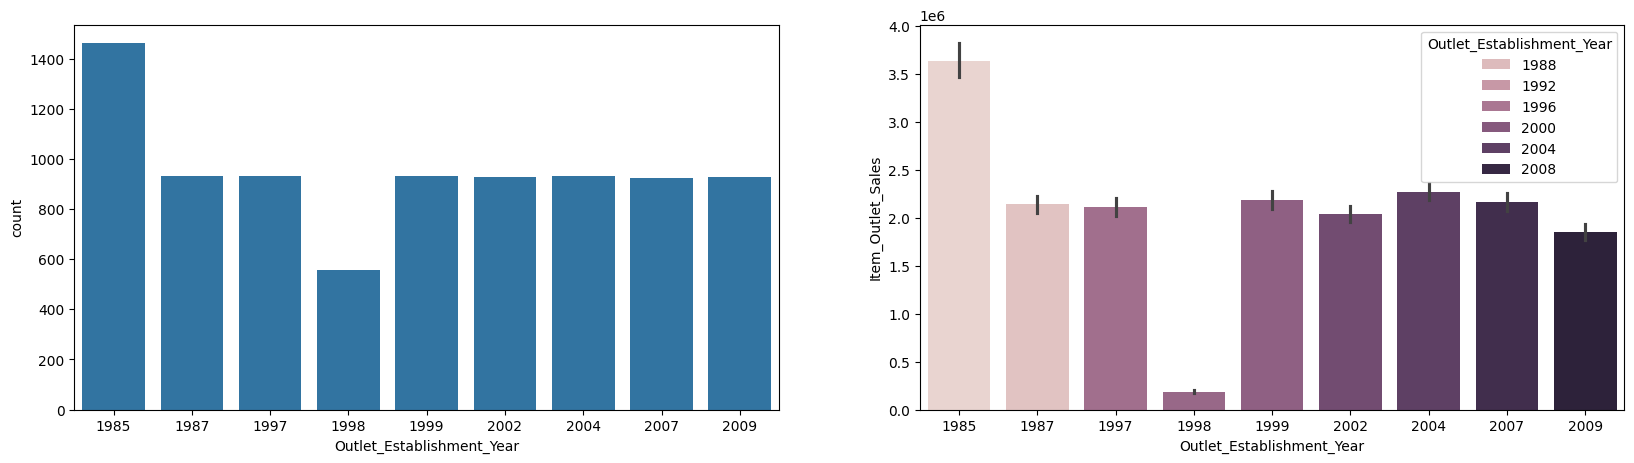

In [243]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 5))
sns.countplot(data=df, x='Outlet_Establishment_Year', ax=axs[0])
sns.barplot(data=df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales', hue='Outlet_Establishment_Year', ax=axs[1], estimator=sum)

Outlets in the dataset were established between 1999 and 2004.
It shows that the outlets built in 1998 have the lowest total sales, and that is probably because there is not enough data on outlets established in 1998.

####How does the Item_Visibility affect the Item Sales? Does it make a difference in different price groups?

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

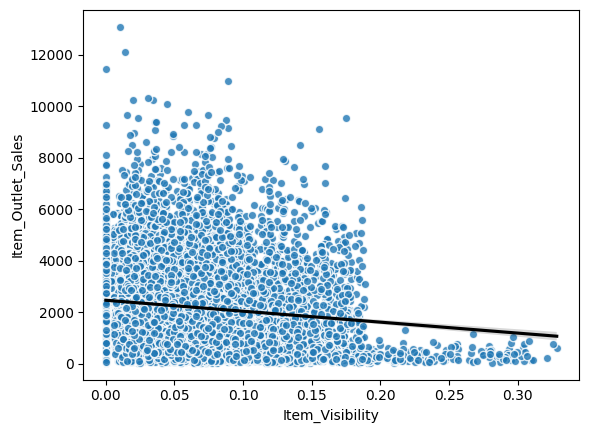

In [244]:
sns.regplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales', line_kws=lkws, scatter_kws=rkws)

According to the heat map, the visibility and sales coefficient of -0.13, and this scatter plot it indicates a very weak negative correlation.

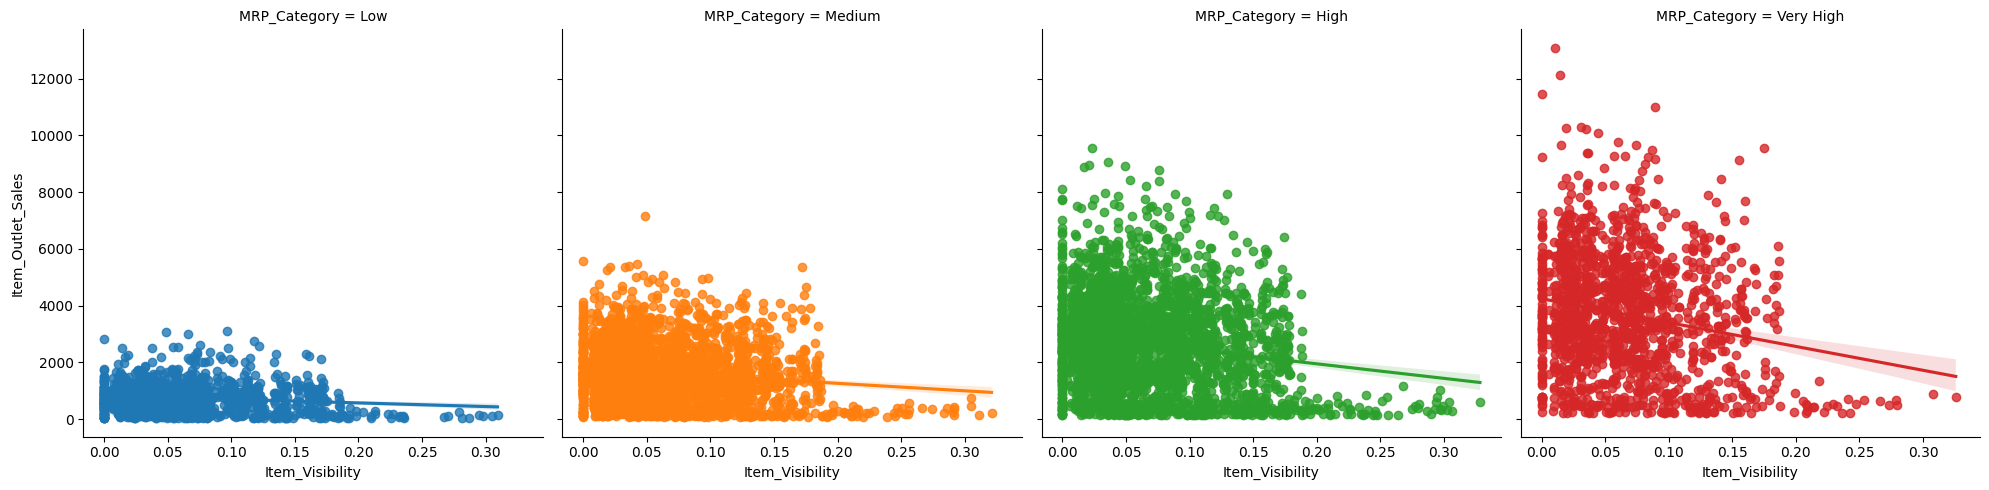

In [245]:
sns.lmplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales', col='MRP_Category', hue='MRP_Category')

After segmenting the data according to the predefined price groups, as noticed in the **very high-priced** items, it shows a moderate negative correlation between the item visibility and the sales.

# Feature Inspection

In [246]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [247]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

### Categorical Features
  1. Item_Type
  2. Outlet_Identifier
  3. Outlet_Type

####Item_Type
  - 	Definition: The category to which the product belongs.
  - Would we know this feature before the target is determined?
    - Yes
  - Is there a business case/understanding reason to exclude based on our business case?
    - No.

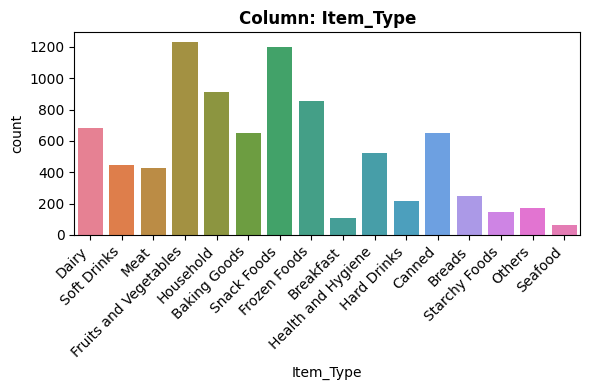

- Feature Type: Categorical
- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Cardinality: High
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [248]:
fig, ax = explore_categorical(df, 'Item_Type')

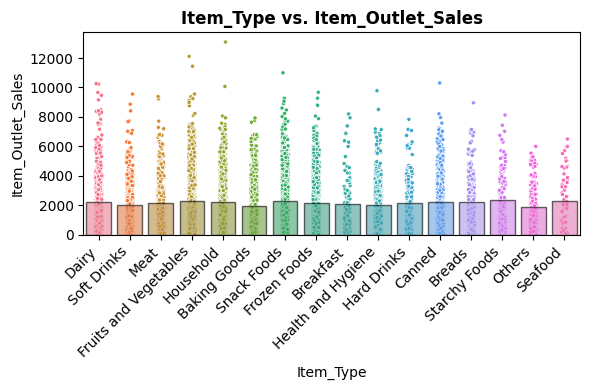

In [249]:
fig, ax = plot_categorical_vs_target(df, 'Item_Type')

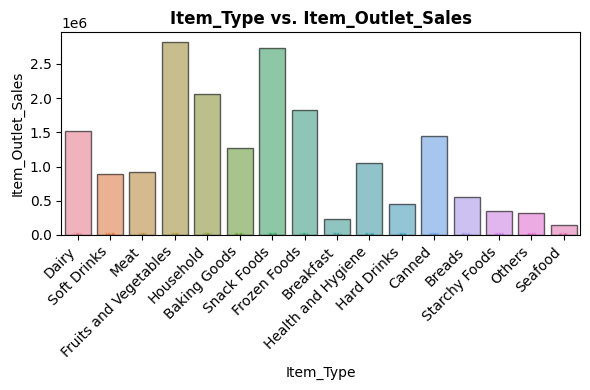

In [250]:
fig, ax = plot_categorical_vs_target(df, 'Item_Type', estimator=sum)

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I expect some types of items might ahcieve more total sales than others.
- Does this feature appear to be a predictor of the target?
  - Yes.
  - In terms of the sales means, it shows slight variability.
  - In terms of the total sales it shows more obvious variability.


####Outlet_Identifier
  - Store ID
  - Would we know this feature before the target is determined?
    - Yes.
  - Is there a business case/understanding reason to exclude based on our business case?
    - No. Although it is a high cardinality feature.

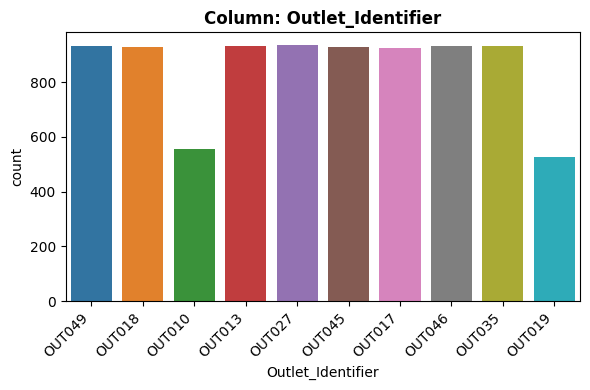

- Feature Type: Categorical
- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Cardinality: High
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [251]:
fig, ax = explore_categorical(df, 'Outlet_Identifier')

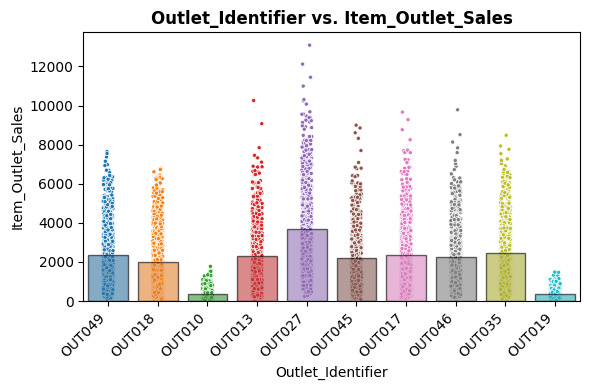

In [252]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Identifier')

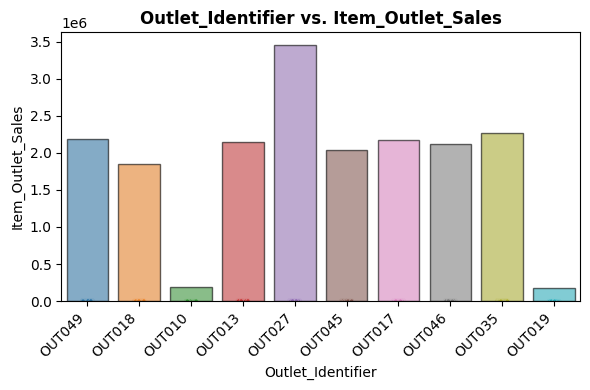

In [253]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Identifier', estimator=sum)

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I expect different outlets to have different customer base and different reputation wich can affect the outlet total sales.
- Does this feature appear to be a predictor of the target?
  - Yes, the plots show total sales variability between categories.

####Outlet_Type
  - Definition: Whether the outlet is a grocery store or some sort of supermarket.
  - Would we know this feature before the target is determined?
    - Yes
  - Is there a business case/understanding reason to exclude based on our business case?
    - No

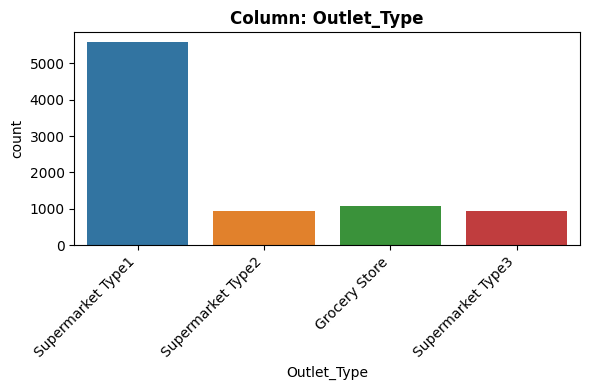

- Feature Type: Categorical
- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Cardinality: Low
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [254]:
fig, ax = explore_categorical(df, 'Outlet_Type')

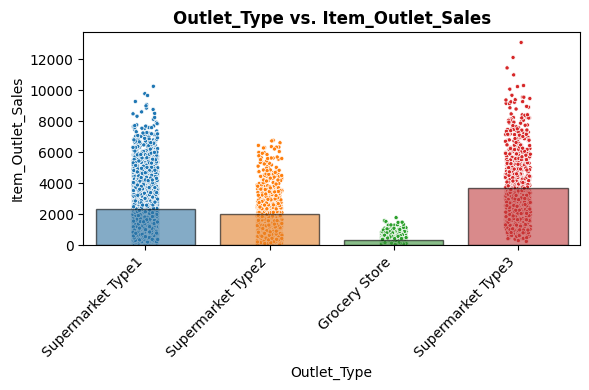

In [255]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Type')

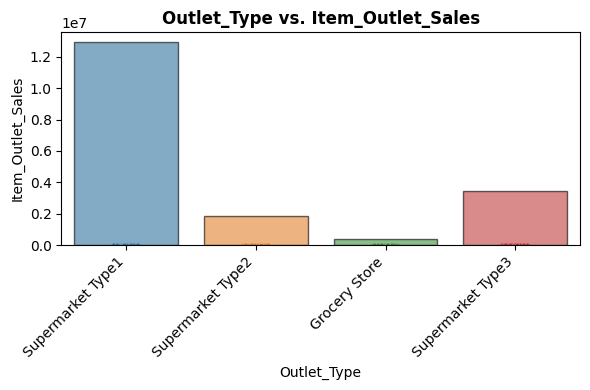

In [256]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Type', estimator=sum)

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, outlet type might affect sales for the items and the outlet itself
- Does this feature appear to be a predictor of the target?
  - Yes, the plots show sales variability between categories.


### Ordinal Features
  1. Outlet_Size
  2. Outlet_Location_Type
  3. Item_Fat_Content
  4. Outlet_Establishment_Year

####Outlet_Size
  - Definition: The size of the store in terms of ground area covered.
  - What would you do with the null values?
    - Impute with 'MISSING'
  - Would we know this feature before the target is determined?
    - Maybe.
  - Is there a business case/understanding reason to exclude based on our business case?
    - No


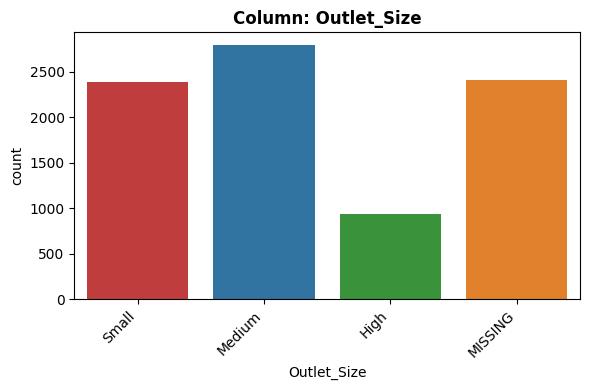

- Feature Type: Ordinal
- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Cardinality: Low
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [257]:
order=['Small', 'Medium', 'High', 'MISSING']
fig, ax = explore_categorical(df, 'Outlet_Size', ftype='Ordinal', order=order)

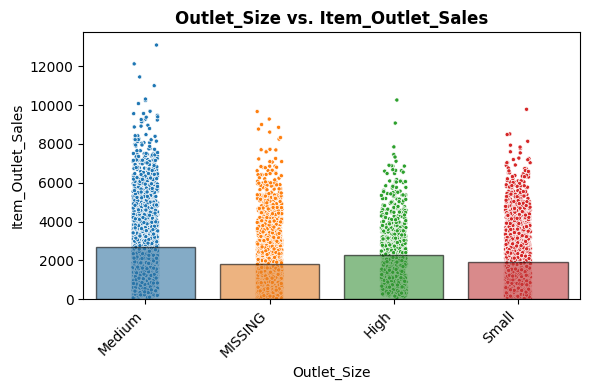

In [258]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Size')

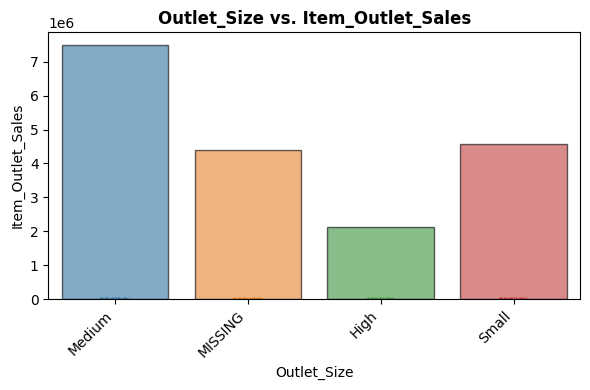

In [259]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Size', estimator=sum)

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - Yes, especially in terms of the total sales


####Outlet_Location_Type
  - Definition: The type of area in which the store is located
  - Would we know this feature before the target is determined?
    - Maybe
  - Is there a business case/understanding reason to exclude based on our business case?
    - No



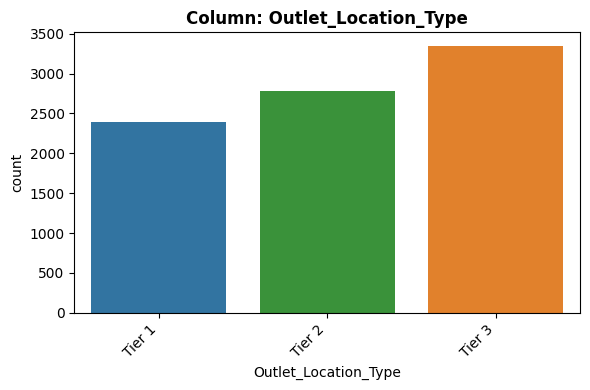

- Feature Type: Ordinal
- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Cardinality: Low
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [260]:
order=['Tier 1', 'Tier 2', 'Tier 3']
fig, ax = explore_categorical(df, 'Outlet_Location_Type', ftype='Ordinal', order=order)

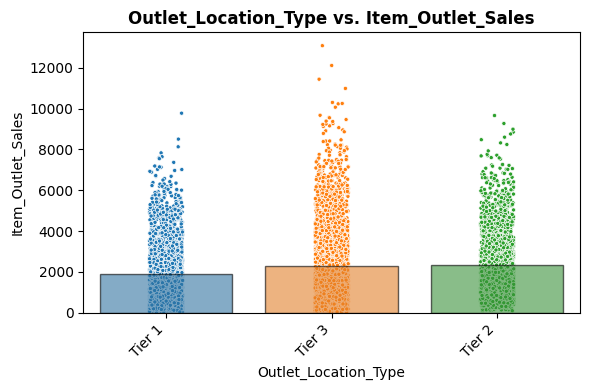

In [261]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Location_Type')

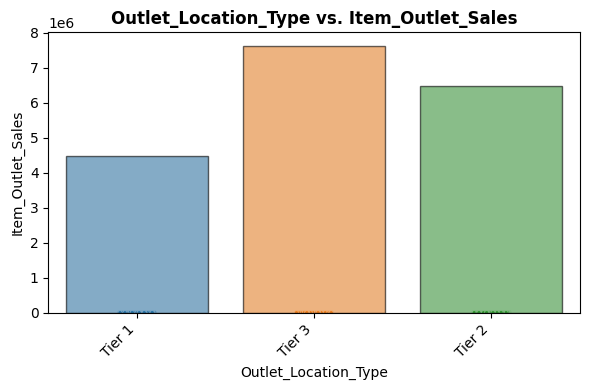

In [262]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Location_Type', estimator=sum)

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - Yes, especially in terms of the total sales


####Outlet_Establishment_Year
  - Definition: The year in which store was established.
  - Would we know this feature before the target is determined?
    - Possibly
  - Is there a business case/understanding reason to exclude based on our business case?
    - I do not think this feature is relevant to predect sale prices.


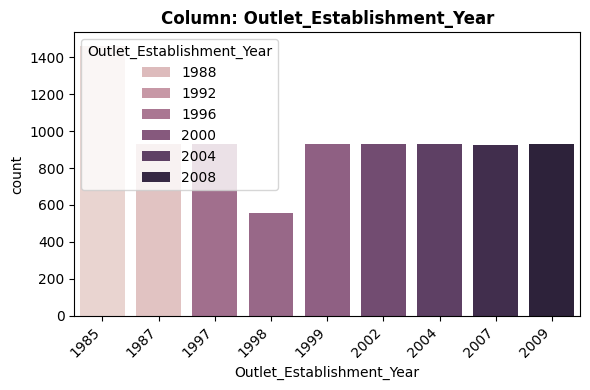

- Feature Type: Ordinal
- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Cardinality: Low
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [263]:
order=['1985', '1987', '1997', '1998', '1999', '2002', '2004', '2007', '2009',]
fig, ax = explore_categorical(df, 'Outlet_Establishment_Year', ftype='Ordinal', order=order)

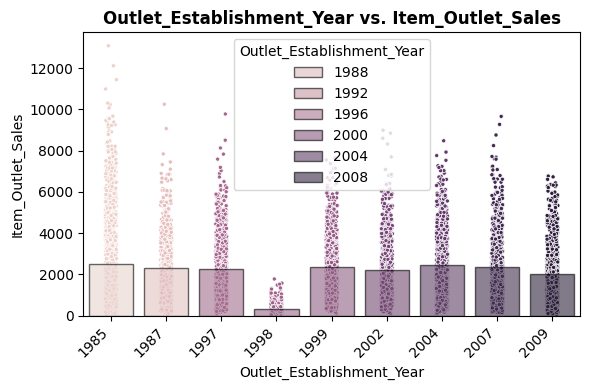

In [264]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Establishment_Year')

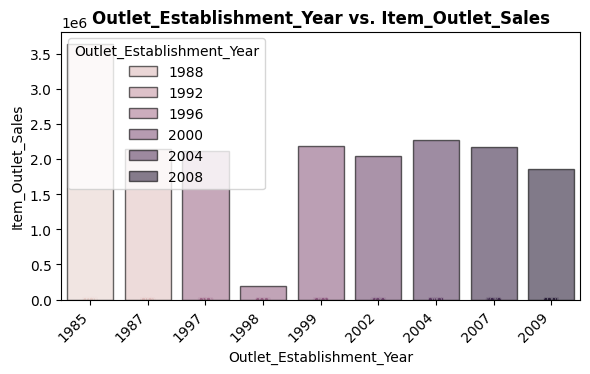

In [265]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Establishment_Year', estimator=sum)

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - Not really.

####Item_Fat_Content
  - Definition: Whether the product is low-fat or regular.
  - Would we know this feature before the target is determined?
    - Maybe
  - Is there a business case/understanding reason to exclude based on our business case?
    - No.

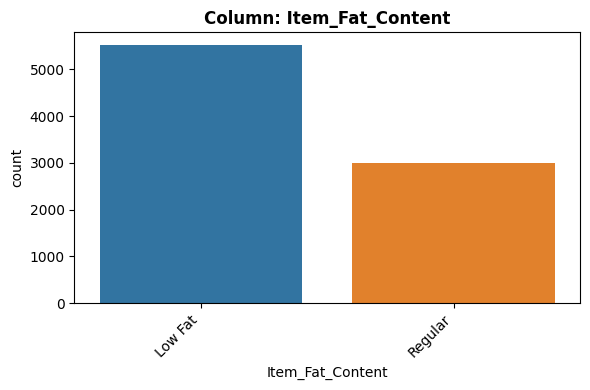

- Feature Type: Categorical
- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Cardinality: Low
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [266]:
order=['Low Fat', 'Regular']
fig, ax = explore_categorical(df, 'Item_Fat_Content', order=order)

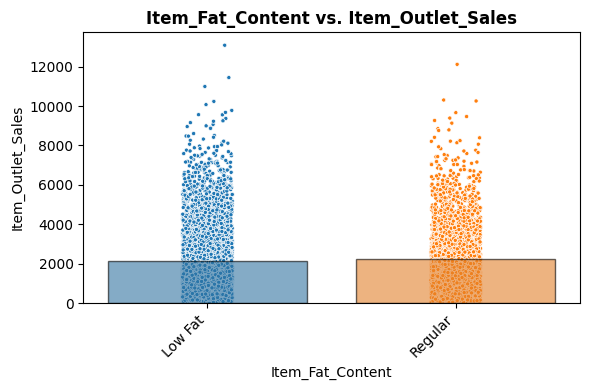

In [267]:
fig, ax = plot_categorical_vs_target(df, 'Item_Fat_Content')

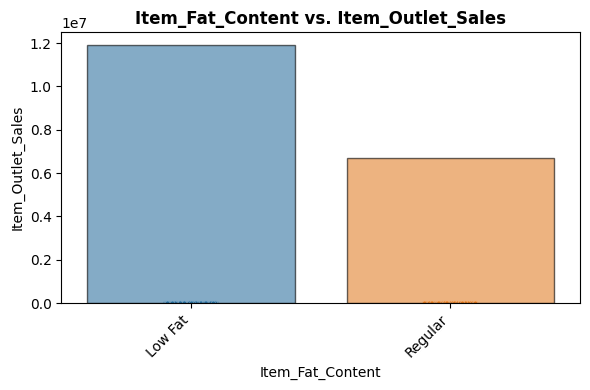

In [268]:
fig, ax = plot_categorical_vs_target(df, 'Item_Fat_Content', estimator=sum)

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - No, in terms of mean sales.
  - Yes in terms of total sales


###Numeric Features
  1. Item_Weight
  2. Item_Visibility
  3. Item_MRP
  4. Item_Outlet_Sales

####Item_Weight
  - Definition: Weight of product
  - Feature Type: Numeric
  - What would you do with the null values?
    - Impute with the mean.
    - Or with the weight recorded for the same id in other records, and for the rest missing values impute with the mean.
  - Would we know this feature before the target is determined?
    - Yes
  - Is there a business case/understanding reason to exclude based on our business case?
    - No.

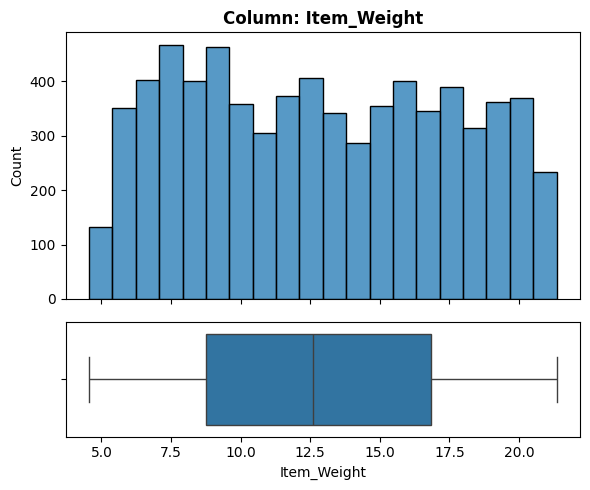

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [269]:
fig, ax = explore_numeric(df, 'Item_Weight')

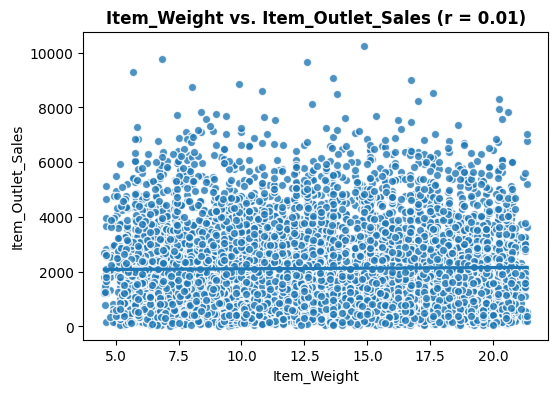

In [270]:
fig, ax = plot_numeric_vs_target(df, 'Item_Weight')

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I would expect people to have be affected by the wieght of the item they are buying, which will affect the item sales.
- Does this feature appear to be a predictor of the target?
  - No, there seem to be no relation according to the plot. As it shows a week regression line implying that whenever the item weight change, the item outlet sales stay around the same value.


####Item_Visibility
  - Definition: The percentage of total display area of all products in a store allocated to the particular product.
  - Would we know this feature before the target is determined?
    - Yes
  - Is there a business case/understanding reason to exclude based on our business case?
    - No.

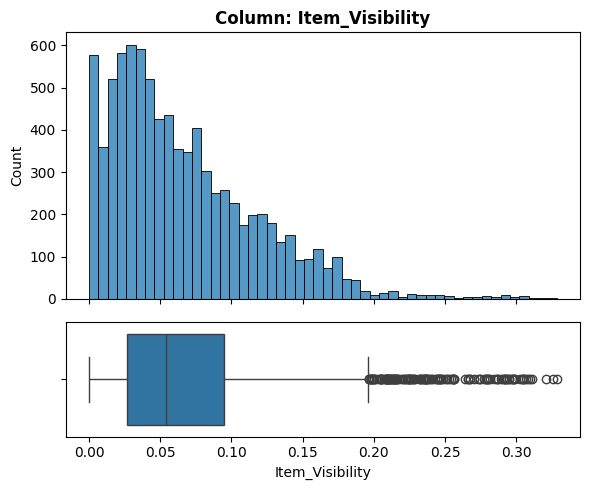

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [271]:
fig, ax = explore_numeric(df, 'Item_Visibility')

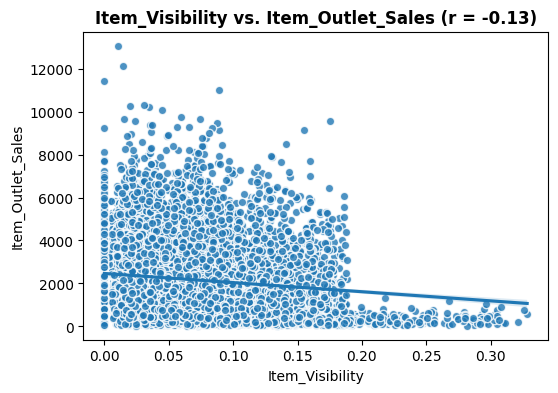

In [272]:
fig, ax = plot_numeric_vs_target(df, 'Item_Visibility')

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I expect when a product has more visibility to be selled more, meaning to acheive more sales.
- Does this feature appear to be a predictor of the target?
  - Not really, very week negative correlation. In other words, when the visibility increases, the item outlet sales decrease very slightly, as if almost it is not affected.


####Item_MRP
  - Definition: Maximum Retail Price (list price) of the product.
  - Feature Type: Numeric
  - Would we know this feature before the target is determined?
    - Yes
  - Is there a business case/understanding reason to exclude based on our business case?
    - No

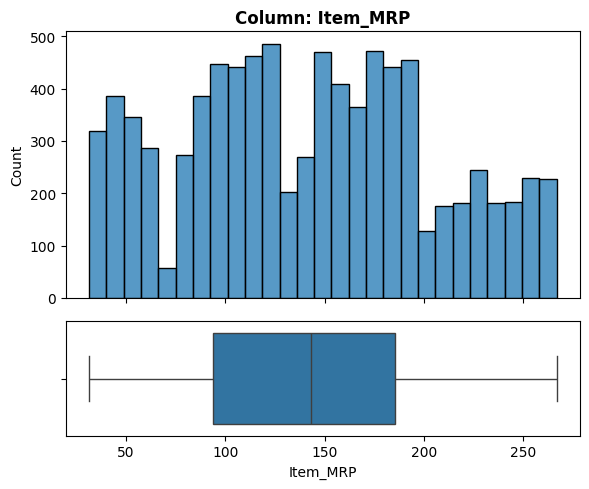

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [273]:
fig, ax = explore_numeric(df, 'Item_MRP')

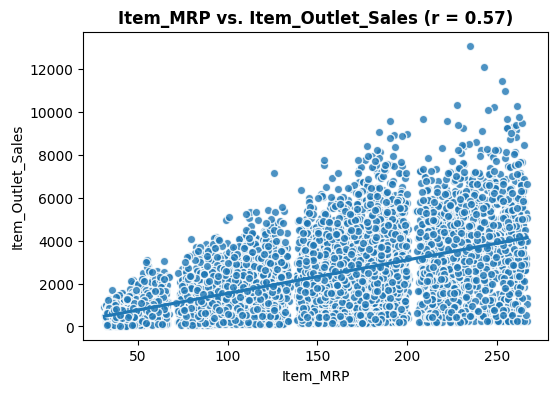

In [274]:
fig, ax = plot_numeric_vs_target(df, 'Item_MRP')

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I expected when the item price increases it will achieve greater sales.
- Does this feature appear to be a predictor of the target?
  - Yes, very good predictor as it shows in the plot. when the item price increase the item outlet sales also increase.


####Item_Outlet_Sales
  - Definition: Sales of the product in the particular store. This is the target variable to be predicted.
  - This is the target feature.

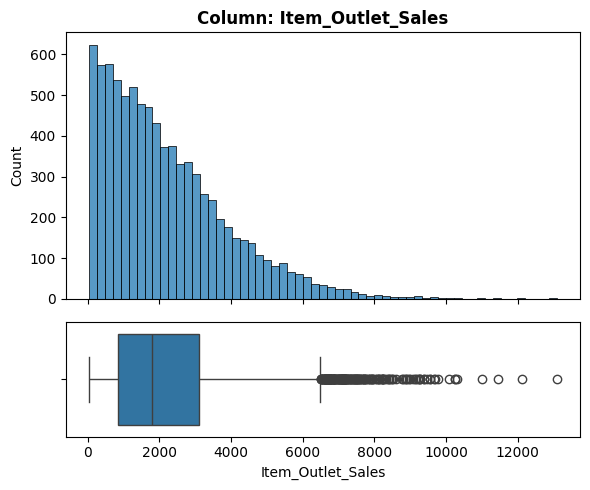

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [275]:
fig, ax = explore_numeric(df, 'Item_Outlet_Sales')

# Preprocessing

In [276]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(transform_output='pandas')

In [277]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
MRP_Category                    0
dtype: int64

In [278]:
y = df['Item_Outlet_Sales']
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [279]:
num_cols = X.select_dtypes(include='number').columns
ord_cols = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']
cat_cols = X.select_dtypes(include='object').drop(columns=ord_cols).columns

In [280]:
for col in ord_cols:
  print("Value counts for column: ", df[col].value_counts())
  print("\n")

Value counts for column:  Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


Value counts for column:  Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64


Value counts for column:  Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64




In [212]:
X_train.head()

Item_Weight Item_Fat_Content  Item_Visibility     Item_Type  Item_MRP  \
4776       16.350          Low Fat         0.029565     Household  256.4646   
7510       15.250          Regular         0.000000   Snack Foods  179.7660   
5828       12.350          Regular         0.158716          Meat  157.2946   
5327        7.975          Low Fat         0.014628  Baking Goods   82.3250   
4810       19.350          Low Fat         0.016645  Frozen Foods  120.9098   

     Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
4776            OUT018                       2009      Medium   
7510            OUT018                       2009      Medium   
5828            OUT049                       1999      Medium   
5327            OUT035                       2004       Small   
4810            OUT045                       2002         NaN   

     Outlet_Location_Type        Outlet_Type MRP_Category  
4776               Tier 3  Supermarket Type2    Very High  
7510               Tier 3  Supermarket Type2         High  
5828               Tier 1  Supermarket Type1         High  
5327               Tier 2  Supermarket Type1       Medium  
4810               Tier 2  Supermarket Type1       Medium

In [282]:
# For numeric data
# We need a simple imputer for the Item Weight missing values
# And a scaler for the values
num_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

# For categorical data
# We only need a one hot encoder for the categories
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# For ordinal data
# We need a simple imputer for the Outlet Size values
# We need an ordinal encoder for the categories
# And a scaler for the encoded values
fat_content_cats = ['Low Fat', 'Regular']
size_cats = ['Small', 'Medium', 'High', 'MISSING']
loc_type_cats = ['Tier 1', 'Tier 2', 'Tier 3']


ord_categoties = [fat_content_cats, size_cats, loc_type_cats]

ord_pipe = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='MISSING'),
    OrdinalEncoder(categories=ord_categoties),
    StandardScaler())

# Column transformer tuples
num_tuple = ('numeric', num_pipe, num_cols)
cat_tuple = ('categorical', ohe, cat_cols)
ord_tuple = ('ordinal', ord_pipe, ord_cols)

# Column transformer
ct = ColumnTransformer([num_tuple, cat_tuple, ord_tuple], verbose_feature_names_out=False)

# Fit for the training data
ct.fit(X_train)

# Transform both testing and training data
X_train_tf = ct.transform(X_train)
X_test_tf = ct.transform(X_test)

In [283]:
X_train.head()

Item_Weight Item_Fat_Content  Item_Visibility     Item_Type  Item_MRP  \
4776       16.350          Low Fat         0.029565     Household  256.4646   
7510       15.250          Regular         0.000000   Snack Foods  179.7660   
5828       12.350          Regular         0.158716          Meat  157.2946   
5327        7.975          Low Fat         0.014628  Baking Goods   82.3250   
4810       19.350          Low Fat         0.016645  Frozen Foods  120.9098   

     Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
4776            OUT018                       2009      Medium   
7510            OUT018                       2009      Medium   
5828            OUT049                       1999      Medium   
5327            OUT035                       2004       Small   
4810            OUT045                       2002         NaN   

     Outlet_Location_Type        Outlet_Type MRP_Category  
4776               Tier 3  Supermarket Type2    Very High  
7510               Tier 3  Supermarket Type2         High  
5828               Tier 1  Supermarket Type1         High  
5327               Tier 2  Supermarket Type1       Medium  
4810               Tier 2  Supermarket Type1       Medium

In [284]:
X_train_tf.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
4776     0.817249        -0.712775  1.828109                   1.327849   
7510     0.556340        -1.291052  0.603369                   1.327849   
5828    -0.131512         1.813319  0.244541                   0.136187   
5327    -1.169219        -1.004931 -0.952591                   0.732018   
4810     1.528819        -0.965484 -0.336460                   0.493686   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
4776                     0.0               0.0                  0.0   
7510                     0.0               0.0                  0.0   
5828                     0.0               0.0                  0.0   
5327                     1.0               0.0                  0.0   
4810                     0.0               0.0                  0.0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  ...  \
4776               0.0              0.0                     0.0  ...   
7510               0.0              0.0                     0.0  ...   
5828               0.0              0.0                     0.0  ...   
5327               0.0              0.0                     0.0  ...   
4810               0.0              0.0                     1.0  ...   

      Outlet_Identifier_OUT045  Outlet_Identifier_OUT046  \
4776                       0.0                       0.0   
7510                       0.0                       0.0   
5828                       0.0                       0.0   
5327                       0.0                       0.0   
4810                       1.0                       0.0   

      Outlet_Identifier_OUT049  Outlet_Type_Grocery Store  \
4776                       0.0                        0.0   
7510                       0.0                        0.0   
5828                       1.0                        0.0   
5327                       0.0                        0.0   
4810                       0.0                        0.0   

      Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
4776                            0.0                            1.0   
7510                            0.0                            1.0   
5828                            1.0                            0.0   
5327                            1.0                            0.0   
4810                            1.0                            0.0   

      Outlet_Type_Supermarket Type3  Item_Fat_Content  Outlet_Size  \
4776                            0.0         -0.740321    -0.338062   
7510                            0.0          1.350766    -0.338062   
5828                            0.0          1.350766    -0.338062   
5327                            0.0         -0.740321    -1.193861   
4810                            0.0         -0.740321     1.373536   

      Outlet_Location_Type  
4776              1.084948  
7510              1.084948  
5828             -1.384777  
5327             -0.149914  
4810             -0.149914  

[5 rows x 37 columns]

# Modeling

In [285]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

## Linear Regression

In [286]:
# Instantiate the linear regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train_tf, y_train)

# Evaualte the model predections
evaluate_regression(lr, X_train_tf, y_train, X_test_tf, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.129
- MSE = 1,297,558.136
- RMSE = 1,139.104
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.120
- MSE = 1,194,349.715
- RMSE = 1,092.863
- R^2 = 0.567


- For training data:
  - According to the MAE the model is off by average **847** dollars.
  - According to the **RMSE** the model is off by average **1,139** dollars.
  - The model covers **56.2%** of the data variation.
- For testing data:
  - According to the **MAE** the model is off by average **804** dollars.
  - According to the **RMSE** the model is off by average **1,092** dollars.
  - The model covers **56.7%** of the data variation.


  Over all, the model shows similar performance on both training and test sets, but is doing slightly better on the testing data set, with higher **R^2** value - meaning that it explains more percentage of data variation in the test set, around **56.7%**.


  Still, the **MAE**, **RMSE** errors are large and accodring to the **MAE** and given that the median item outlet price is **1794.331**, the model is off by **47.2%** on the training dataset and **44.8%** on the testing dataset.


  This is not a good model to work with and it is somewhat ***underfit***.

In [287]:
df['Item_Outlet_Sales'].median()

1794.331

In [288]:
847.129/df['Item_Outlet_Sales'].median()

0.4721141194127505

In [289]:
804.120/df['Item_Outlet_Sales'].median()

0.44814474029596546

## Random Forest

### Default Model

In [290]:
# Instantiate the linear regression model
rf = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf.fit(X_train_tf, y_train)

# Evaualte the model predections
evaluate_regression(rf, X_train_tf, y_train, X_test_tf, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.330
- MSE = 182,304.426
- RMSE = 426.971
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 765.205
- MSE = 1,213,643.126
- RMSE = 1,101.655
- R^2 = 0.560


- For training data:
  - According to the MAE the model is off by average **296** dollars.
  - According to the **RMSE** the model is off by average **426.9** dollars.
  - The model covers **93.8%** of the data variation.
- For testing data:
  - According to the **MAE** the model is off by average **765** dollars.
  - According to the **RMSE** the model is off by average **1,101.6** dollars.
  - The model covers **56.0%** of the data variation.


  The model is performing very well on the training data extremely overfit, with much less **MAE**, **RMSE** errors for the training data and R^2 value of 0.93.

  This is not a good model to work with because it is ***overfit*** and it needs parameter tuning.


  In comparison with the linear regression model, this model has worse test R^2 of 0.559 and is extremely overfit. Therefore, the linear regression model is better, and generalizes better on unseen data than this default random forest one with R^2 of 0.567.

### Grid Search Cross Validation

In [291]:
# Instantiate the linear regression model
rf = RandomForestRegressor(random_state=42)

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [292]:
# Instantiate the parameter list to tune
params = {'max_depth': [None, 10, 15, 20, 40],
          'n_estimators':[100, 120, 140, 160, 180, 200],
          'min_samples_leaf':[2, 3, 4],
          'max_features':[0.3, 0.4, 0.5, None],
          'oob_score':[True,False]}

# Instantiate the GridSearch CV
cv = RandomizedSearchCV(rf, params, cv=5, n_jobs=-1, verbose=1)


# Fit the model to the training data
cv.fit(X_train_tf, y_train)

# Show the best parameters
cv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'oob_score': False,
 'n_estimators': 160,
 'min_samples_leaf': 3,
 'max_features': 0.4,
 'max_depth': 10}

In [293]:
# Evaualte the model predections using the best mode chosen by the CV GridSearch
best_model = cv.best_estimator_
best_model.fit(X_train_tf, y_train)
evaluate_regression(best_model, X_train_tf, y_train, X_test_tf, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 692.440
- MSE = 969,204.006
- RMSE = 984.482
- R^2 = 0.673

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 729.084
- MSE = 1,096,123.951
- RMSE = 1,046.959
- R^2 = 0.603


- For training data:
  - According to the MAE the model is off by average **692.4** dollars.
  - According to the **RMSE** the model is off by average **984.2** dollars.
  - The model covers **67.3%** of the data variation.

- For testing data:
  - According to the **MAE** the model is off by average **729.0** dollars.
  - According to the **RMSE** the model is off by average **1,046.9** dollars.
  - The model covers **60.3%** of the data variation.

  The model is doing better with higher R^2 value on the testing set than the default one and a drop in performance on the training dataset, means reduced overfitting. But it is still slightly overfit, with much close values for **MAE**, **RMSE** errors for the default model.

  The model predictions were off by 40% on the training data and by 58.6% on the testing data. This is not that good of a performance.

In [299]:
735.3/df['Item_Outlet_Sales'].median()

0.4097906127687701

In [300]:
1053/df['Item_Outlet_Sales'].median()

0.5868482459479327

# Evaluation

##Model Recommendation

For model recommendation, let us compare the performance of the models against the testing data:


1. Tuned Random Forest vs. Default Random Forest:

  The tuned Random Forest model shows improvements in the test R^2 and reduced overfitting compared to the default Random Forest. This indicates that the tuning process helped improve the model performance and it generalizes better on unseen data.

2. Tuned Random Forest vs. Linear Regression:

  - The tuned Random Forest model performs better on both training and test data, as evidenced by lower errors (MAE, RMSE) and higher R2

  - The gap between training and test metrics suggests that while it still overfits to some extent, it generalizes better than the Linear Regression model. Because the ability of Random Forest models to capture complexities allows it to perform better on test data, despite slight overfitting.


  **The Tuned Random Forest model is recommended as it offers the good metrics and generalizes better on unseen data, despite the slight overfit. I still think there is room for improving the model by playing around with the parameters and increasing the dataset, there is data shortage in some types of data, previously mentioned.**

  - The Tuned Random Forest model has an R^2 value of approximately 0.597 on the test data, meaning it can explain around 60% of the variance in item sales. This suggests that the model captures a substantial portion of the factors affecting sales but still leaves about 40% unexplained, indicating room for improvement.

  - The model’s RMSE on test data is approximately 1,054 dollars. This means that, on average, the model’s predictions differ from actual sales figures by around 1,054 dollars. I chose RMSE because it provides a clear, interpretable measure of average prediction error in dollars, while also penalizing the more significant prediction errors.
